In [1]:
import sys
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import math
import tf_utils
import tensorflow as tf

In [2]:
from experiments import test

In [3]:
conf = test.get_conf()

-------------------------------------------------------------------
verify current settings!! 
model :  CDNA
schedsamp_k :  900.0
data_dir :  /home/ashvin/lsdc/pushing_data/finer_temporal_resolution_substep10/train
num_iterations :  50000
learning_rate :  0.001
num_masks :  10
skip_frame :  2
batch_size :  32
train_val_split :  0.95
experiment_name :  originial_with_newdata
visualize :  
file_visual :  
sequence_length :  15
pretrained_model :  
context_frames :  2
use_state :  1
-------------------------------------------------------------------


In [4]:
from read_tf_record import build_tfrecord_input

In [5]:
image_batch, action_batch, state_batch = build_tfrecord_input(conf, training=True)
sess = tf.InteractiveSession()
tf.train.start_queue_runners(sess)
sess.run(tf.initialize_all_variables())

using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]


In [6]:
image_data, action_data, state_data = sess.run([image_batch, action_batch, state_batch])

print 'action:', action_data.shape
print 'action: batch ind 0', action_data[0]
print 'action: batch ind 1', action_data[1]
print 'images:', image_data.shape

print 'states:', state_data.shape
print 'states: batch ind 0', state_data[0]
print 'states: batch ind 1', state_data[1]
print 'average speed in dir1:', np.average(state_data[:,:,3])
print 'average speed in dir2:', np.average(state_data[:,:,2])

action: (32, 15, 2)
action: batch ind 0 [[ 1.33076692  1.69630349]
 [ 1.33076692  1.69630349]
 [ 1.33076692  1.69630349]
 [ 4.86130047 -1.38846743]
 [ 4.86130047 -1.38846743]
 [ 4.86130047 -1.38846743]
 [-5.17281675  3.48019767]
 [-5.17281675  3.48019767]
 [-5.17281675  3.48019767]
 [ 1.30837965  3.17183995]
 [ 1.30837965  3.17183995]
 [ 1.30837965  3.17183995]
 [-1.58438313 -0.40410274]
 [-1.58438313 -0.40410274]
 [-1.58438313 -0.40410274]]
action: batch ind 1 [[-3.14094591  0.92014003]
 [-3.14094591  0.92014003]
 [-3.14094591  0.92014003]
 [-2.07672071  2.59803772]
 [-2.07672071  2.59803772]
 [-2.07672071  2.59803772]
 [ 0.02408284  4.52269745]
 [ 0.02408284  4.52269745]
 [ 0.02408284  4.52269745]
 [ 0.06699041 -5.41989374]
 [ 0.06699041 -5.41989374]
 [ 0.06699041 -5.41989374]
 [ 1.8068589   2.77427316]
 [ 1.8068589   2.77427316]
 [ 1.8068589   2.77427316]]
images: (32, 15, 64, 64, 3)
states: (32, 15, 4)
states: batch ind 0 [[-0.10170992  0.18421923 -0.19362153  0.35069153]
 [-0.1341

In [7]:
action_data.shape

(32, 15, 2)

(array([  18.,   24.,  102.,  114.,  198.,  210.,  129.,  123.,   36.,    6.]),
 array([-9.29752922, -7.53270617, -5.76788311, -4.00306005, -2.238237  ,
        -0.47341394,  1.29140911,  3.05623217,  4.82105522,  6.58587828,
         8.35070133]),
 <a list of 10 Patch objects>)

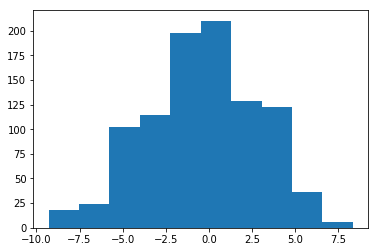

In [15]:
x = action_data.flatten()
plt.hist(x)

In [11]:
np.max(action_data)

8.3507013

In [12]:
np.min(action_data)

-9.2975292

In [8]:
image_data.shape

(32, 15, 64, 64, 3)

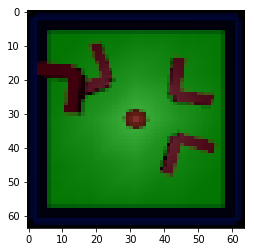

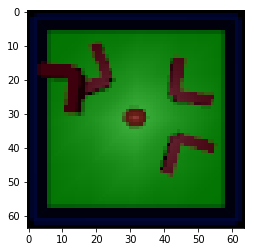

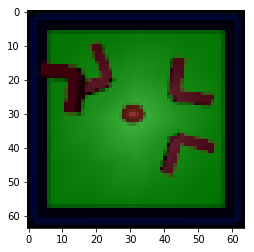

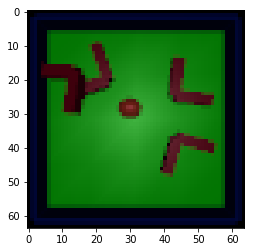

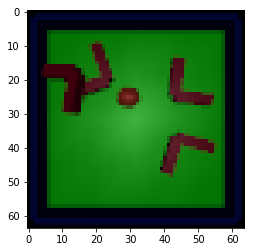

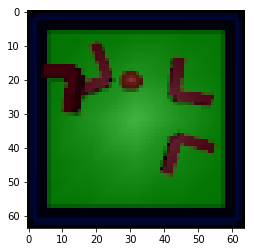

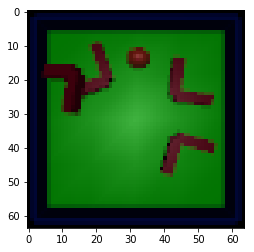

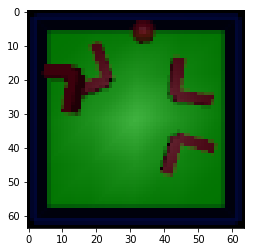

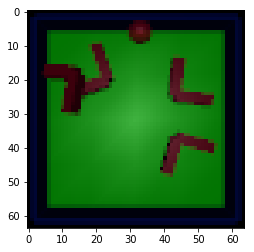

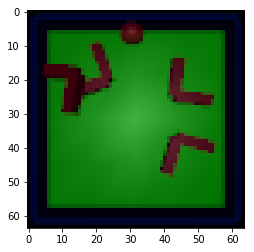

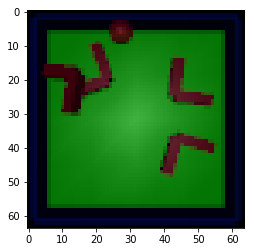

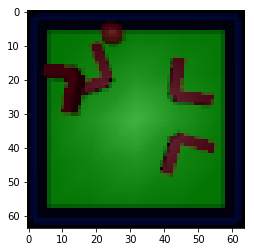

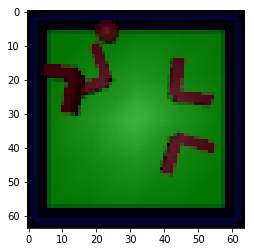

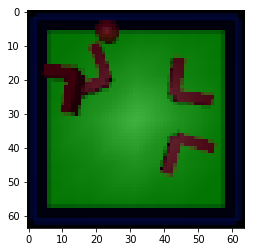

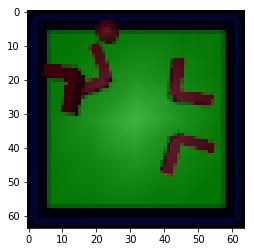

In [11]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :])

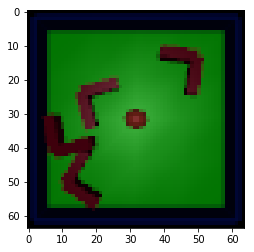

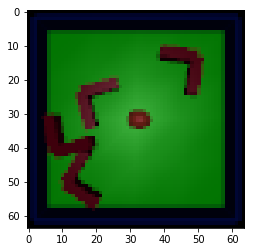

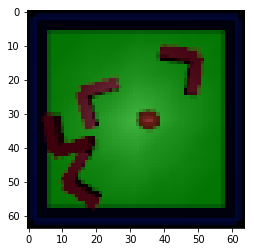

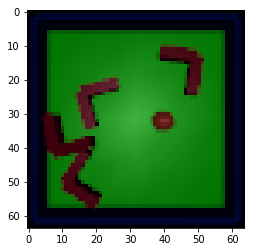

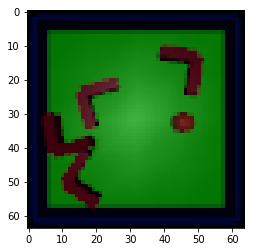

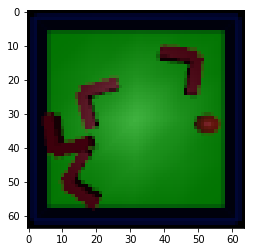

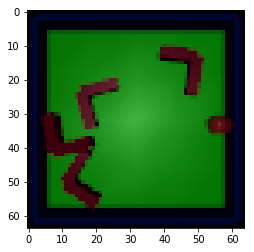

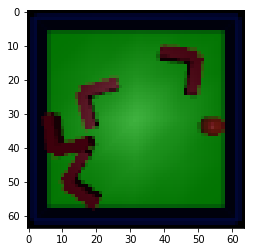

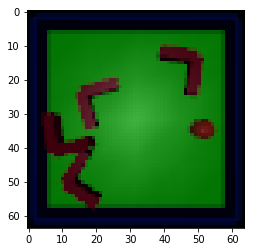

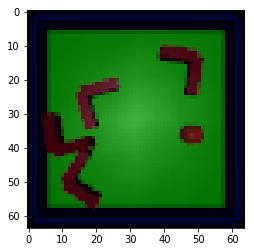

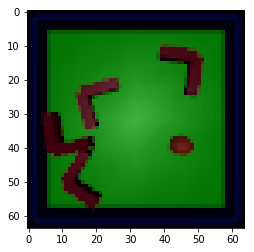

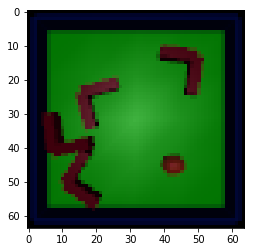

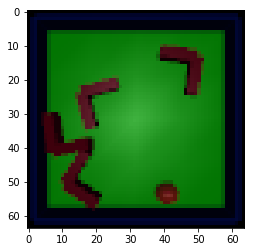

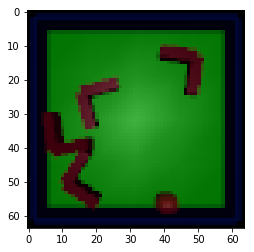

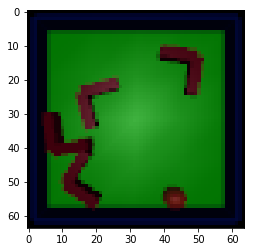

In [12]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[1, i, :, :, :])